<a href="https://colab.research.google.com/github/gnicoleta/BDA/blob/main/K_MEANS_IMPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fisierele sunt tinute pe google drive, iar datele incarcate din fisiere in functie de dimenisiunea aleasa pt setul de date

In [213]:
#open dataset file from drive
from google.colab import drive

drive.mount('/content/drive')


dataset_size = 150
data_file_path = "/content/drive/MyDrive/BDA/Dataset1/" + f'Iris-{str(dataset_size)}.txt'
open(data_file_path, 'r')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<_io.TextIOWrapper name='/content/drive/MyDrive/BDA/Dataset1/Iris-150.txt' mode='r' encoding='UTF-8'>

Setul de date este citit din fisier si incarcat intr-un dataframe, care mai apoi este prelucrat la forma dorita (in cazul de fata fara ultima coloana, feature, pt a facilita calcularea distantelor)

In [214]:
#load data
import numpy as np
import pandas as pd

np.random.seed(50)

data_frame = pd.read_csv(data_file_path, header=None)
iris_data = data_frame.values

#fara label -> ai nevoie doar de nr ca sa poti calcula distanta
data = iris_data[:, :iris_data.shape[1]-1]


In [215]:
data_frame.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Initializarea centroizilor
Se pot alege centroizi random din setul de date sau se pot pre-initializa cu anumite valori (de exemplu prima valoare, ultima valoarea si o valoare din mijlocul setului de date)

In [216]:
#init centroids
import numpy as np

k = 3
random_centroids = data_frame.sample(n=k).values[:, :-1] #dont need the last value, the label
print("Random: ", random_centroids)

print(data[0]) #first
print(data[-1]) #last
print(data[round(len(data)/2)+1]) #middle

predefined_centroids = np.empty((0, 4))
predefined_centroids = np.append(predefined_centroids, np.array([data[0]]), axis=0)
predefined_centroids = np.append(predefined_centroids, np.array([data[-1]]), axis=0)
predefined_centroids = np.append(predefined_centroids, np.array([data[round(len(data)/2)]]), axis=0)
print("\nPredefined: ", predefined_centroids)

Random:  [[5.6 3.0 4.1 1.3]
 [6.3 2.5 4.9 1.5]
 [5.4 3.4 1.7 0.2]]
[5.1 3.5 1.4 0.2]
[5.9 3.0 5.1 1.8]
[6.8 2.8 4.8 1.4]

Predefined:  [[5.1 3.5 1.4 0.2]
 [5.9 3.0 5.1 1.8]
 [6.6 3.0 4.4 1.4]]


Functia pe calcularea distantei dintre 2 puncte (in cazul de fata 2 vectori cu cate 4 feature-uri numerice, fara al 5-lea label)

In [217]:
import numpy as np
from numpy.linalg import norm

def euclidian_distance(a, b): 
  return norm(np.array(a)-np.array(b)) #ultima valoare este un label, nu poti calcual distanta de string, doar de nr

**get_closest_centroid**: returneaza indexul centroidului cel mai apropiat de punctul dat

**compute_clusters**: returneaza k clustere ce vor contine elemente din 'spectrul' centroidului corespunzator fiecarui cluster

**compute_new_centroids**: calculeaza media artimetica a tuturor punctelor (vectorilor) dintr-un anumit cluster, si se vor obtine noi k centroizi fata de care se va relua procesul de incadrare a punctelor din dataset intr-un anumit cluster

**compute_sse**: calculeaza sum squarred error adica variata centroizilor. Daca mai exista o schimbare in alegerea centroizilor, in cazul in care nu mai exista, centroizii alesi reprezinta solutia cea mai optima de clusterizare a datelor

In [218]:
import numpy as np

#returneaza indexul centroidul de care punctul curent este cel mai apropiat
def get_closest_centroid(data_point, centroids):
  #print(centroids)
  distances_to_centroids = [] #lista care va contine cele k distante de la punct la fiecare centroid
  for centroid in centroids:
    distances_to_centroids.append(euclidian_distance(data_point, centroid))
    #print(distances_to_centroids)

  #cu cat mai mica distanta cu atat e mai aproape punctul curent de centroidul respectiv
  closest_centroid_index = np.argmin(distances_to_centroids)
  return closest_centroid_index

#returenaza k clustere ce vor contine elementele cele mai apropiate de fiecare centroid (apartinator fiecarui cluster)
def compute_clusters(data, centroids, k):
  #print(centroids)
  clusters = [[] for _ in range(k)] #k clustere

  #fiecare centroid_index va corespunde unui cluster, si in functie de centroidul de care este punctul curent cel mai apropiat
  #punctul respectiv va fi introdus in clusterul  aferent (dat de centroid print indexul acestuia)
  for data_point_index, data_point in enumerate(data):
    centroid_index = get_closest_centroid(data_point, centroids)
    clusters[centroid_index].append(data_point_index)
    
    #clusters[centroid_index].append(data_point)
  return clusters

#assign teh mean value of the clusters to teh centrois
#for each cluster we calculate the mean
def compute_new_centroids(k, data_points, clusters, centroids):
  new_centroids = np.full_like(centroids, 0) #init new centroids with
  for cluster_idnex, cluster in enumerate (clusters):
    if len(data_points[cluster]) > 0:
      cluster_mean = np.mean(data_points[cluster], axis=0)
      #print(cluster_mean)
      new_centroids[cluster_idnex] = cluster_mean
    
  return new_centroids

#verifica daca distanta dintre centroizi s-a schimbat
def compute_sse(k, centroids_old, centroids):
  distances = [euclidian_distance(centroids_old[i], centroids[i]) for i in range(k)]
  return sum(distances)




In [219]:
get_closest_centroid(data, predefined_centroids)
cc = compute_clusters(data, predefined_centroids,3)
print(predefined_centroids)
compute_new_centroids(k, data, cc, predefined_centroids)

[[5.1 3.5 1.4 0.2]
 [5.9 3.0 5.1 1.8]
 [6.6 3.0 4.4 1.4]]


array([[5.007843137254902, 3.400000000000001, 1.4941176470588236,
        0.2607843137254901],
       [6.457627118644065, 2.9593220338983044, 5.401694915254236,
        1.9440677966101692],
       [6.002499999999999, 2.7525, 4.2225, 1.2949999999999995]],
      dtype=object)

Algoritmul kmeans
max_iterations: dupa cate iteratii sa se sfarseasca algoritmul
k: 
error_margin: variata maxima admisa
data: setul de date
centroids: setul nitial de centroizi

In [220]:
import numpy as np
import time

def kmeans(max_iterations, k, error_margin, data=data, centroids=predefined_centroids):
  print(centroids)
  
  clusters=[[] for _ in range (k)]

  for i in range(max_iterations):
    print("\n\n")
    start = time.time()
    clusters = compute_clusters(data, centroids, k)
    #tine minte vechii centroizi ca sa vezi convergenta
    centroids_old = centroids
    centroids = compute_new_centroids(k, data, clusters, centroids)

    sq_error = compute_sse(k, centroids_old, centroids)  
    if sq_error <= error_margin:
      stop = time.time()
      duration = stop-start
      print("Iteration ", i+1, " algoritm has converged, variance: ", sq_error, ", duration: ", duration)
      break
      
    stop = time.time()
    duration = stop-start
    print("Iteration ", i+1, ", variance: ", sq_error, ", duration: ", duration)
  
    for _ in range (k):
        print("\tCluster ", _, ": ", len(clusters[_]))

  for _ in range (k):
        print("\n Cluster ", _, ": ", len(clusters[_]))
  return (clusters, centroids)
      

In [221]:

print(predefined_centroids)
print(random_centroids)
(resulted_clusters, optim_centroids) = kmeans(7, 3, 0, data, random_centroids)

[[5.1 3.5 1.4 0.2]
 [5.9 3.0 5.1 1.8]
 [6.6 3.0 4.4 1.4]]
[[5.6 3.0 4.1 1.3]
 [6.3 2.5 4.9 1.5]
 [5.4 3.4 1.7 0.2]]
[[5.6 3.0 4.1 1.3]
 [6.3 2.5 4.9 1.5]
 [5.4 3.4 1.7 0.2]]



Iteration  1 , variance:  1.5661984346598896 , duration:  0.009661197662353516
	Cluster  0 :  31
	Cluster  1 :  69
	Cluster  2 :  50



Iteration  2 , variance:  0.1966118462793534 , duration:  0.009034156799316406
	Cluster  0 :  36
	Cluster  1 :  64
	Cluster  2 :  50



Iteration  3 , variance:  0.14564990035668446 , duration:  0.007001638412475586
	Cluster  0 :  40
	Cluster  1 :  60
	Cluster  2 :  50



Iteration  4 , variance:  0.1824408422639 , duration:  0.008821964263916016
	Cluster  0 :  45
	Cluster  1 :  55
	Cluster  2 :  50



Iteration  5 , variance:  0.13955467813087297 , duration:  0.008734703063964844
	Cluster  0 :  49
	Cluster  1 :  51
	Cluster  2 :  50



Iteration  6 , variance:  0.18542144045488335 , duration:  0.017277240753173828
	Cluster  0 :  54
	Cluster  1 :  46
	Cluster  2 :  50



Iterati

[[51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 119, 121, 123, 126, 127, 138, 142, 149], [50, 52, 76, 77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 146, 147, 148], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]]


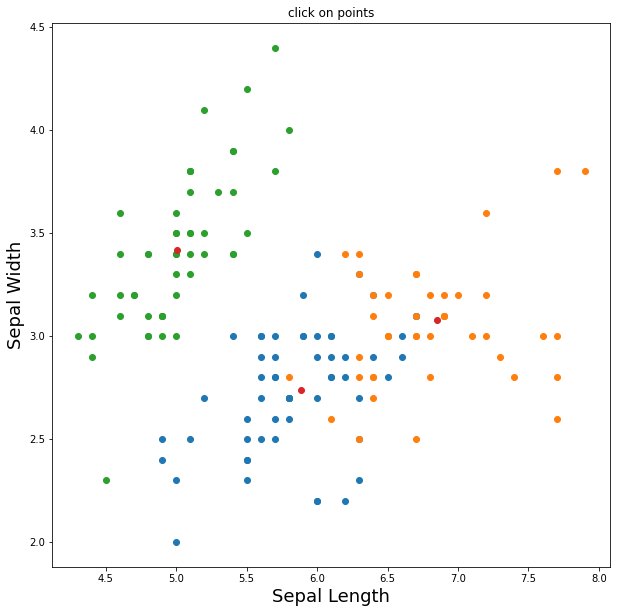

In [222]:
import matplotlib.pyplot as plt
print(resulted_clusters)
cluster_labels =['cluster1','cluster2', 'cluster3']
colors = {'cluster1':'red', 'cluster2':'green', 'cluster3':'blue'}

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)


for cluster_idnex, cluster in enumerate (resulted_clusters):
    cluster_data = iris_data[cluster]
    plt.scatter(cluster_data[:,0], cluster_data[:,1], cmap='gist_rainbow')
    # for xy in zip(cluster_data[:,0], cluster_data[:,1]):
    #   ax.annotate('(%s)' %cluster_data[0], xy=xy, textcoords='data')

ax.set_title('click on points')

plt.scatter(cent[:,0], cent[:,1], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.show()
